In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pred_root = '../prediction/dFaF/2019-01-05_16'
dirs = os.listdir(pred_root)
dirs.remove('dFaF_config.py')
print(dirs)

['29', '19', '79', '59', '69', '49', '9', '39']


In [30]:
car_detection_ap = []
car_orientation_ap = []
car_detection_ground_ap = []
car_detection_3d_ap = []

for name in dirs:
    file = open(os.path.join(pred_root, name, 'output.txt'), 'r')
    idx = (int(name) + 1) // 10
    lines = file.readlines()
    for line in lines:
        if 'car_detection AP:' in line:
            numbers = line.split(':')[1].strip().split()
            numbers = [float(i) for i in numbers]
            numbers.insert(0, idx)
            car_detection_ap.append(numbers)
        if 'car_orientation AP:' in line:
            numbers = line.split(':')[1].strip().split()
            numbers = [float(i) for i in numbers]
            numbers.insert(0, idx)
            car_orientation_ap.append(numbers)
        if 'car_detection_ground AP:' in line:
            numbers = line.split(':')[1].strip().split()
            numbers = [float(i) for i in numbers]
            numbers.insert(0, idx)
            car_detection_ground_ap.append(numbers)
        if 'car_detection_3d AP:' in line:
            numbers = line.split(':')[1].strip().split()
            numbers = [float(i) for i in numbers]
            numbers.insert(0, idx)
            car_detection_3d_ap.append(numbers)

In [31]:
car_detection_ap.sort()
car_orientation_ap.sort()
car_detection_ground_ap.sort()
car_detection_3d_ap.sort()

car_detection_ap = np.array(car_detection_ap)
car_orientation_ap = np.array(car_orientation_ap)
car_detection_ground_ap = np.array(car_detection_ground_ap)
car_detection_3d_ap = np.array(car_detection_3d_ap)

In [32]:
def draw_ap(list, subplot_code=111):
    idx = list[:, 0]
    easy_y = list[:, 1]
    mid_y = list[:, 2]
    hard_y = list[:, 3]
    plt.plot(idx, easy_y)
    plt.plot(idx, mid_y)
    plt.plot(idx, hard_y)
    plt.subplot(subplot_code)

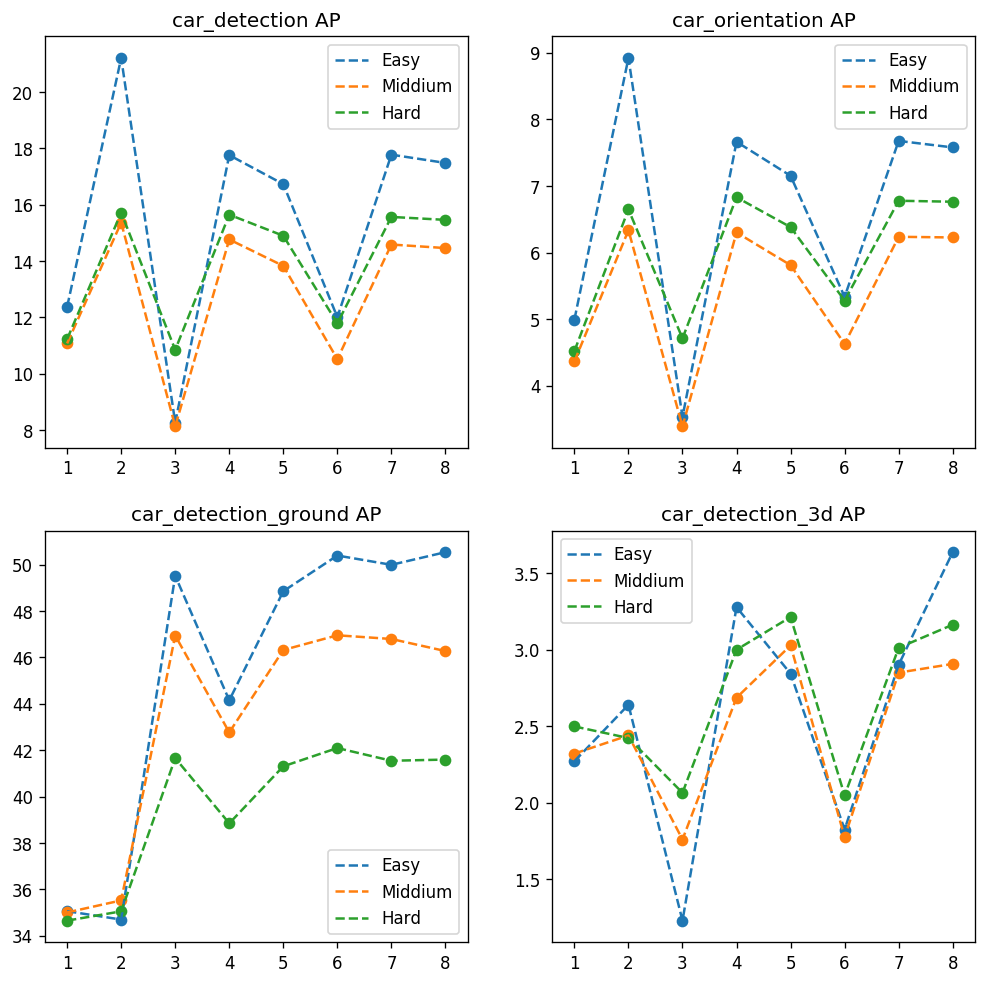

In [33]:
plt.figure(figsize=(10,10),dpi=120)
idx = car_detection_ap[:, 0]

# draw car_detection AP
plt.subplot(221)
plt.title('car_detection AP')
plt.plot(   idx, car_detection_ap[:, 1], '--')
plt.scatter(idx, car_detection_ap[:, 1])
plt.plot(   idx, car_detection_ap[:, 2], '--')
plt.scatter(idx, car_detection_ap[:, 2])
plt.plot(   idx, car_detection_ap[:, 3], '--')
plt.scatter(idx, car_detection_ap[:, 3])
plt.legend(('Easy','Middium', 'Hard'), loc='best')

# draw car_orientation AP
plt.subplot(222)
plt.title('car_orientation AP')
plt.plot(   idx, car_orientation_ap[:, 1], '--')
plt.scatter(idx, car_orientation_ap[:, 1])
plt.plot(   idx, car_orientation_ap[:, 2], '--')
plt.scatter(idx, car_orientation_ap[:, 2])
plt.plot(   idx, car_orientation_ap[:, 3], '--')
plt.scatter(idx, car_orientation_ap[:, 3])
plt.legend(('Easy','Middium', 'Hard'), loc='best')

# draw car_detection_ground AP
plt.subplot(223)
plt.title('car_detection_ground AP')
plt.plot(   idx, car_detection_ground_ap[:, 1], '--')
plt.scatter(idx, car_detection_ground_ap[:, 1])
plt.plot(   idx, car_detection_ground_ap[:, 2], '--')
plt.scatter(idx, car_detection_ground_ap[:, 2])
plt.plot(   idx, car_detection_ground_ap[:, 3], '--')
plt.scatter(idx, car_detection_ground_ap[:, 3])
plt.legend(('Easy','Middium', 'Hard'), loc='best')

# draw car_detection_3d AP
plt.subplot(224)
plt.title('car_detection_3d AP')
plt.plot(   idx, car_detection_3d_ap[:, 1], '--')
plt.scatter(idx, car_detection_3d_ap[:, 1])
plt.plot(   idx, car_detection_3d_ap[:, 2], '--')
plt.scatter(idx, car_detection_3d_ap[:, 2])
plt.plot(   idx, car_detection_3d_ap[:, 3], '--')
plt.scatter(idx, car_detection_3d_ap[:, 3])
plt.legend(('Easy','Middium', 'Hard'), loc='best')

plt.show()